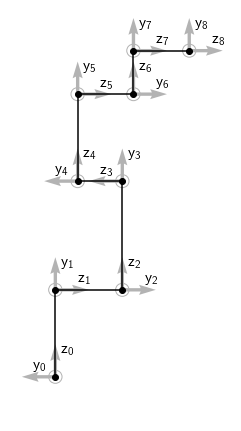

In [106]:
%matplotlib inline
from matplotlib.pyplot import figure
from matplotlib import rcParams, rc
from matplotlib.patches import Arc, Circle

from numpy import sin, cos, pi, matrix, array, eye, degrees, arctan2

def rot_z(θ):
    from numpy import sin, cos, matrix
    A = matrix([[cos(θ), -sin(θ), 0, 0],
                [sin(θ), cos(θ), 0, 0],
                [0, 0, 1, 0],
                [0, 0, 0, 1]])
    return A

def tras_x(x):
    from numpy import matrix
    A = matrix([[1, 0, 0, x],
                [0, 1, 0, 0],
                [0, 0, 1, 0],
                [0, 0, 0, 1]])
    return A

def tras_y(y):
    from numpy import matrix
    A = matrix([[1, 0, 0, 0],
                [0, 1, 0, y],
                [0, 0, 1, 0],
                [0, 0, 0, 1]])
    return A

def dh(a,d,α,θ):
    from numpy import matrix, sin, cos
    A = matrix([[cos(θ), -sin(θ)*cos(α), sin(θ)*sin(α), a*cos(θ)],
                [sin(θ), cos(θ)*cos(α), -cos(θ)*sin(α), a*sin(θ)],
                [0, sin(α), cos(α), d],
                [0,0,0,1]])
    return A

def ejes(axis, origen, orientacion, long=0.5):
    
    i = orientacion[:3, :1].T.tolist()[0]
    j = orientacion[:3, 1:2].T.tolist()[0]
    k = orientacion[:3, 2:3].T.tolist()[0]    
    
    xs, ys, zs = origen.T.tolist()[0]
    
    us, vs, ws = zip(i)
    axis.quiver(xs, ys, us, vs, scale=1/long, scale_units="xy", angles="xy", color="333", width=0.015)

    us, vs, ws = zip(j)
    axis.quiver(xs, ys, us, vs, scale=1/long, scale_units="xy", angles="xy", color="333", width=0.015)

τ = 2*pi
δ = 0.1

l1, l2, l3, l4, l5, l6, l7, l8 = 0.4,0.3,0.5,0.2,0.4,0.25,0.2,0.25

A1 = tras_x(l1)*rot_z(-τ/4)
A2 = tras_x(l2)
A3 = rot_z(τ/4)*tras_x(l3)
A4 = tras_y(l4)
A5 = tras_x(l5)*rot_z(-τ/4)
A6 = tras_x(l6)
A7 = tras_y(l7)
A8 = tras_x(l8)

H0 = rot_z(τ/4)
H1 = H0*A1
H2 = H1*A2
H3 = H2*A3
H4 = H3*A4
H5 = H4*A5
H6 = H5*A6
H7 = H6*A7
H8 = H7*A8

R0 = H0[:3, :3]
R1, R2 = H1[:3, :3], H2[:3, :3]
R3, R4 = H3[:3, :3], H4[:3, :3]
R5, R6 = H5[:3, :3], H6[:3, :3]
R7, R8 = H7[:3, :3], H8[:3, :3]
o1, o2 = H1[:3, 3:], H2[:3, 3:]
o3, o4 = H3[:3, 3:], H4[:3, 3:]
o5, o6 = H5[:3, 3:], H6[:3, 3:]
o7, o8 = H7[:3, 3:], H8[:3, 3:]
x1, x2 = H1[:3, :1], H2[:3, :1]
x3, x4 = H3[:3, :1], H4[:3, :1]
x5, x6 = H5[:3, :1], H6[:3, :1]
x7, x8 = H7[:3, :1], H8[:3, :1]
y1, y2 = H1[:3, 1:2], H2[:3, 1:2]
y3, y4 = H3[:3, 1:2], H4[:3, 1:2]
y5, y6 = H5[:3, 1:2], H6[:3, 1:2]
y7, y8 = H7[:3, 1:2], H8[:3, 1:2]

o0 = matrix([[0, 0, 0]]).T

xs = [o0.item(0), o1.item(0), o2.item(0), o3.item(0), o4.item(0), o5.item(0), o6.item(0), o7.item(0), o8.item(0)]
ys = [o0.item(1), o1.item(1), o2.item(1), o3.item(1), o4.item(1), o5.item(1), o6.item(1), o7.item(1), o8.item(1)]

p_l1 = o0 + 2*(l1/3)*x1
p_l2 = o1 + 2*(l2/3)*x2
p_l3 = o2 + 2*(l3/3)*x3
p_l4 = o3 + 2*(l4/3)*x4
p_l5 = o4 + 2*(l5/3)*x5
p_l6 = o5 + 2*(l6/3)*x6
p_l7 = o6 + 2*(l7/3)*x7
p_l8 = o7 + 2*(l8/3)*x8

rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ["Noto Sans"]
#rcParams['mathtext.fontset'] = 
rcParams['font.size'] = 16.0
#rc('font',**{'family':'sans-serif','sans-serif':['Noto Sans'], 'size':16.0})
rc('text', usetex=True)

tam=(4*(l2-l4+l6+l8 + 4*δ), 4*(l1+l3+l5+l7 + 4*δ))
tls=True

fig = figure(figsize=tam)
ax = fig.gca()

ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

ax.axes.spines["top"].set_color("none")
ax.axes.spines["bottom"].set_color("none")
ax.axes.spines["left"].set_color("none")
ax.axes.spines["right"].set_color("none")

ax.axes.set_xlim(-2*δ, l2-l4+l6+l8 + 2*δ)
ax.axes.set_ylim(-2*δ, l1+l3+l5+l7 + 2*δ)

eje0 = Circle([xs[0], ys[0]], 0.03, ec='333')
eje0.set_fill(False)
ax.add_patch(eje0)

eje1 = Circle([xs[1], ys[1]], 0.03, ec='333')
eje1.set_fill(False)
ax.add_patch(eje1)

eje2 = Circle([xs[2], ys[2]], 0.03, ec='333')
eje2.set_fill(False)
ax.add_patch(eje2)

eje3 = Circle([xs[3], ys[3]], 0.03, ec='333')
eje3.set_fill(False)
ax.add_patch(eje3)

eje4 = Circle([xs[4], ys[4]], 0.03, ec='333')
eje4.set_fill(False)
ax.add_patch(eje4)

eje5 = Circle([xs[5], ys[5]], 0.03, ec='333')
eje5.set_fill(False)
ax.add_patch(eje5)

eje6 = Circle([xs[6], ys[6]], 0.03, ec='333')
eje6.set_fill(False)
ax.add_patch(eje6)

eje7 = Circle([xs[7], ys[7]], 0.03, ec='333')
eje7.set_fill(False)
ax.add_patch(eje7)

eje8 = Circle([xs[8], ys[8]], 0.03, ec='333')
eje8.set_fill(False)
ax.add_patch(eje8)

ax.plot(xs, ys, "-o", color="k")

ejes(ax, o0, R0, 0.15)
ejes(ax, o1, R1, 0.15)
ejes(ax, o2, R2, 0.15)
ejes(ax, o3, R3, 0.15)
ejes(ax, o4, R4, 0.15)
ejes(ax, o5, R5, 0.15)
ejes(ax, o6, R6, 0.15)
ejes(ax, o7, R7, 0.15)
ejes(ax, o8, R8, 0.15)

ax.text(xs[0] + δ/4, ys[0] + δ, r'$\mathsf{z_0}$')       
ax.text(xs[0] - δ, ys[0] + δ/4, r'$\mathsf{y_0}$')

ax.text(xs[1] + δ/4, ys[1] + δ, r'$\mathsf{y_1}$')        
ax.text(xs[1] + δ, ys[1] + δ/4, r'$\mathsf{z_1}$')

ax.text(xs[2] + δ/4, ys[2] + δ, r'$\mathsf{z_2}$')        
ax.text(xs[2] + δ, ys[2] + δ/4, r'$\mathsf{y_2}$')

ax.text(xs[3] + δ/4, ys[3] + δ, r'$\mathsf{y_3}$')        
ax.text(xs[3] - δ, ys[3] + δ/4, r'$\mathsf{z_3}$')

ax.text(xs[4] + δ/4, ys[4] + δ, r'$\mathsf{z_4}$')       
ax.text(xs[4] - δ, ys[4] + δ/4, r'$\mathsf{y_4}$')

ax.text(xs[5] + δ/4, ys[5] + δ, r'$\mathsf{y_5}$')        
ax.text(xs[5] + δ, ys[5] + δ/4, r'$\mathsf{z_5}$')

ax.text(xs[6] + δ/4, ys[6] + δ, r'$\mathsf{z_6}$')        
ax.text(xs[6] + δ, ys[6] + δ/4, r'$\mathsf{y_6}$')

ax.text(xs[7] + δ/4, ys[7] + δ, r'$\mathsf{y_7}$')        
ax.text(xs[7] + δ, ys[7] + δ/4, r'$\mathsf{z_7}$')

ax.text(xs[8] + δ/4, ys[8] + δ, r'$\mathsf{y_8}$')        
ax.text(xs[8] + δ, ys[8] + δ/4, r'$\mathsf{z_8}$')

fig.savefig('UR-esq.png', transparent=True, dpi=400)

In [11]:
import matplotlib

In [12]:
matplotlib.font_manager._rebuild()

In [35]:
[p for p in zip([0,1], [2,3])][0][0]

0